In [1]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np
import regionmask
import xarray as xr

In [2]:
RESULT_FILE = "canesm5_example_emulation.nc"

In [3]:
result_lat_lon = xr.load_dataset(RESULT_FILE).set_index(z=("lat", "lon")).unstack("z")
result_lat_lon

<xarray.Dataset>
Dimensions:      (lat: 15, lon: 19, realisation: 5, scenario: 14, year: 301)
Coordinates:
  * scenario     (scenario) object 'rcp26' 'rcp45' ... 'ssp534-over' 'ssp585'
  * realisation  (realisation) int64 0 1 2 3 4
  * year         (year) int64 1850 1851 1852 1853 1854 ... 2147 2148 2149 2150
  * lat          (lat) float64 -49.5 -40.5 -31.5 -22.5 ... 49.5 58.5 67.5 76.5
  * lon          (lon) float64 -162.0 -144.0 -126.0 -108.0 ... 126.0 144.0 162.0
Data variables:
    tas          (scenario, realisation, year, lat, lon) float64 nan nan ... nan

Time-mean for different scenarios, median over all realisations.

Text(0.5, 0.98, '2081 - 2100 mean, median over all realisations')

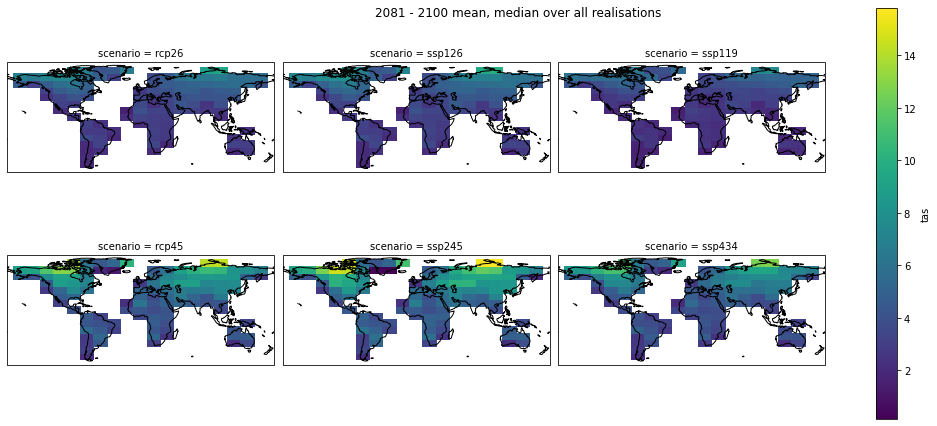

In [4]:
scenarios_to_plot = ["rcp26", "ssp126", "ssp119", "rcp45", "ssp245", "ssp434"]
year_range = range(2081, 2100 + 1)

g = (
    result_lat_lon["tas"]
    .sel(year=year_range, scenario=scenarios_to_plot)
    .mean(dim="year")
    .median(dim="realisation")
    .plot(
        col="scenario", 
        col_wrap=3, 
        subplot_kws={"projection": ccrs.PlateCarree()}, 
        size=3,
        aspect=1.5,
    )
)
for ax in g.axes.flat:
    ax.coastlines()
    
g.fig.suptitle("{} - {} mean, median over all realisations".format(year_range[0], year_range[-1]))

Time-mean for different scenarios, maximum over all realisations.

Text(0.5, 0.98, '2081 - 2100 mean, max. over all realisations')

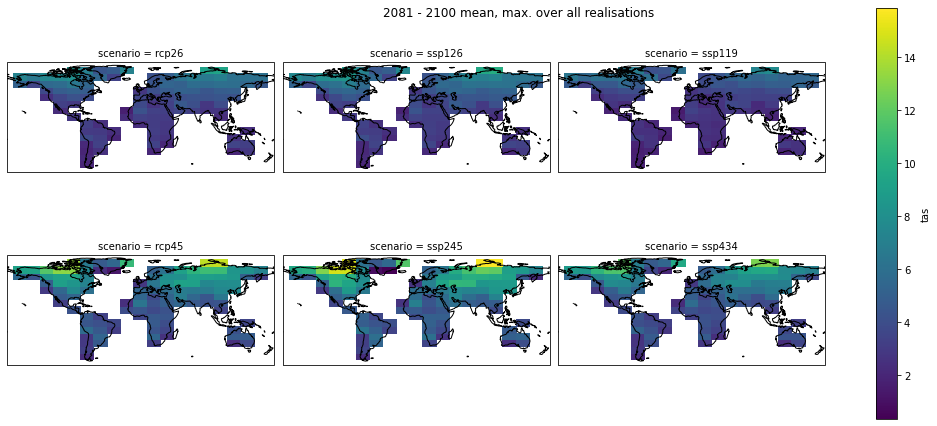

In [5]:
scenarios_to_plot = ["rcp26", "ssp126", "ssp119", "rcp45", "ssp245", "ssp434"]
year_range = range(2081, 2100 + 1)

g = (
    result_lat_lon["tas"]
    .sel(year=year_range, scenario=scenarios_to_plot)
    .mean(dim="year")
    .max(dim="realisation")
    .plot(
        col="scenario", 
        col_wrap=3, 
        subplot_kws={"projection": ccrs.PlateCarree()}, 
        size=3,
        aspect=1.5,
    )
)
for ax in g.axes.flat:
    ax.coastlines()
    
g.fig.suptitle("{} - {} mean, max. over all realisations".format(year_range[0], year_range[-1]))

Time-mean for different scenarios, standard deviation over all realisations.

/data/ubuntu-znicholls/miniconda3/envs/mesmer-openscmrunner/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1664: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


Text(0.5, 0.98, '2081 - 2100 mean, std. over all realisations')

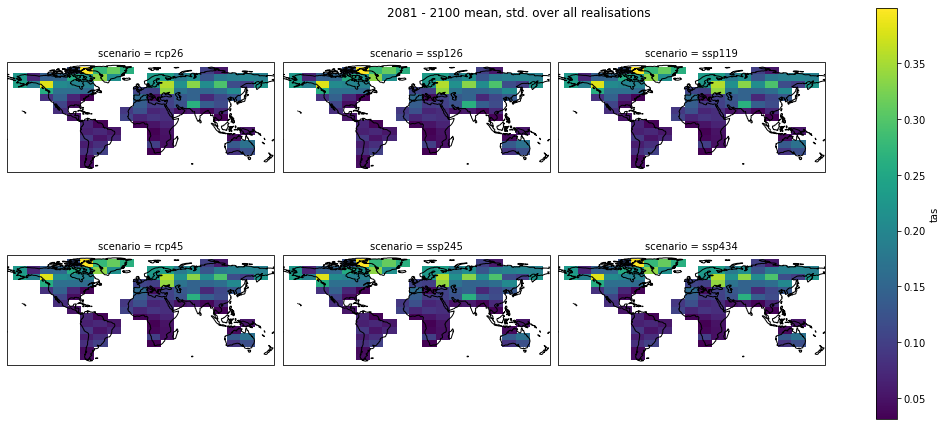

In [6]:
scenarios_to_plot = ["rcp26", "ssp126", "ssp119", "rcp45", "ssp245", "ssp434"]
year_range = range(2081, 2100 + 1)

g = (
    result_lat_lon["tas"]
    .sel(year=year_range, scenario=scenarios_to_plot)
    .mean(dim="year")
    .std(dim="realisation")
    .plot(
        col="scenario", 
        col_wrap=3, 
        subplot_kws={"projection": ccrs.PlateCarree()}, 
        size=3,
        aspect=1.5,
    )
)
for ax in g.axes.flat:
    ax.coastlines()
    
g.fig.suptitle("{} - {} mean, std. over all realisations".format(year_range[0], year_range[-1]))

Basic weighted mean.

In [7]:
weights = np.cos(np.deg2rad(result_lat_lon["tas"].lat))
weights.name = "weights"
weights

<xarray.DataArray 'weights' (lat: 15)>
array([0.64944805, 0.76040597, 0.85264016, 0.92387953, 0.97236992,
       0.99691733, 0.99691733, 0.97236992, 0.92387953, 0.85264016,
       0.76040597, 0.64944805, 0.52249856, 0.38268343, 0.23344536])
Coordinates:
  * lat      (lat) float64 -49.5 -40.5 -31.5 -22.5 -13.5 ... 49.5 58.5 67.5 76.5

In [8]:
global_mean = (
    result_lat_lon["tas"]
    .weighted(weights)
    .mean(dim=["lat", "lon"])
)
global_mean

<xarray.DataArray 'tas' (scenario: 14, realisation: 5, year: 301)>
array([[[ 1.40686510e-01,  4.48982131e-01,  3.49811013e-01, ...,
          3.28475386e+00,  2.99647847e+00,  3.04500036e+00],
        [ 2.54832152e-01,  1.93429971e-01, -8.75027839e-02, ...,
          3.61863895e+00,  3.30581082e+00,  3.05118396e+00],
        [ 1.47913964e-01,  2.51817610e-01,  1.29678627e-01, ...,
          3.01228603e+00,  2.93790780e+00,  3.18648132e+00],
        [-2.31144413e-02, -8.27553953e-03,  2.20927307e-02, ...,
          3.22808158e+00,  3.12634481e+00,  3.20802870e+00],
        [-2.46628633e-01, -3.53312093e-02,  6.32004482e-02, ...,
          3.38334933e+00,  3.32828308e+00,  3.28870232e+00]],

       [[ 1.40686659e-01,  4.48978995e-01,  3.49754830e-01, ...,
          6.04306461e+00,  5.77063484e+00,  5.84003912e+00],
        [ 2.54832301e-01,  1.93426835e-01, -8.75589669e-02, ...,
          6.37694971e+00,  6.07996719e+00,  5.84622273e+00],
        [ 1.47914113e-01,  2.51814474e-01,  1.29622444e-01, ...,
          5.77059678e+00,  5.71206417e+00,  5.98152008e+00],
        [-2.31142922e-02, -8.27867573e-03,  2.20365476e-02, ...,
          5.98639233e+00,  5.90050117e+00,  6.00306747e+00],
        [-2.46628484e-01, -3.53343455e-02,  6.31442651e-02, ...,
...
          3.62792893e+00,  3.33093016e+00,  3.37046304e+00],
        [ 2.53428280e-01,  1.82697289e-01, -1.04722520e-01, ...,
          3.96181403e+00,  3.64026250e+00,  3.37664664e+00],
        [ 1.46510092e-01,  2.41084928e-01,  1.12458891e-01, ...,
          3.35546110e+00,  3.27235948e+00,  3.51194400e+00],
        [-2.45183135e-02, -1.90082215e-02,  4.87299461e-03, ...,
          3.57125665e+00,  3.46079649e+00,  3.53349138e+00],
        [-2.48032505e-01, -4.60638912e-02,  4.59807121e-02, ...,
          3.72652440e+00,  3.66273476e+00,  3.61416500e+00]],

       [[ 1.39282638e-01,  4.38249449e-01,  3.32591277e-01, ...,
          1.69370441e+01,  1.67694814e+01,  1.69364787e+01],
        [ 2.53428280e-01,  1.82697289e-01, -1.04722520e-01, ...,
          1.72709292e+01,  1.70788138e+01,  1.69426623e+01],
        [ 1.46510092e-01,  2.41084928e-01,  1.12458891e-01, ...,
          1.66645763e+01,  1.67109107e+01,  1.70779597e+01],
        [-2.45183135e-02, -1.90082215e-02,  4.87299461e-03, ...,
          1.68803718e+01,  1.68993477e+01,  1.70995070e+01],
        [-2.48032505e-01, -4.60638912e-02,  4.59807121e-02, ...,
          1.70356396e+01,  1.71012860e+01,  1.71801807e+01]]])
Coordinates:
  * scenario     (scenario) object 'rcp26' 'rcp45' ... 'ssp534-over' 'ssp585'
  * realisation  (realisation) int64 0 1 2 3 4
  * year         (year) int64 1850 1851 1852 1853 1854 ... 2147 2148 2149 2150

Plot median of all realisations for all scenarios.

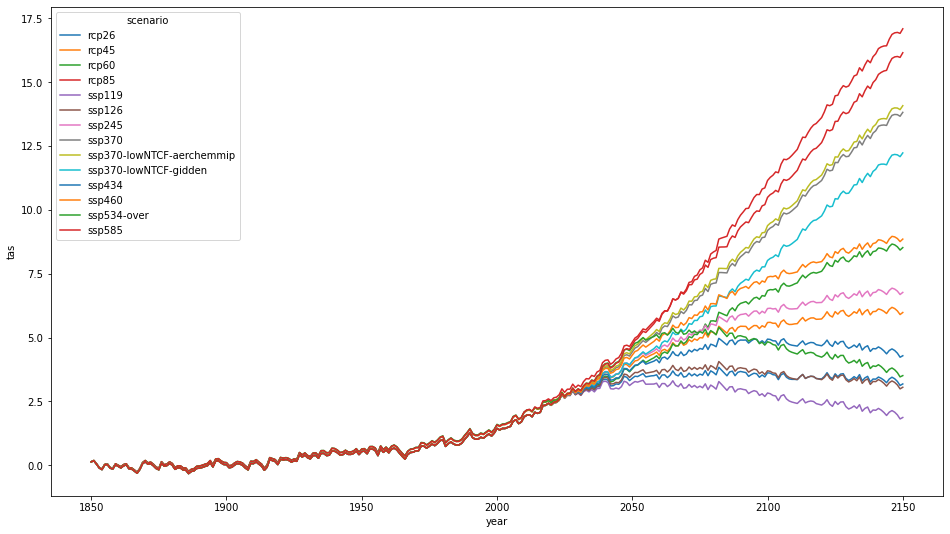

In [9]:
(
    global_mean
    .median(dim="realisation")
    .plot
    .line(hue="scenario", x="year", figsize=(16, 9))
)

Compare realisations for a single scenario.

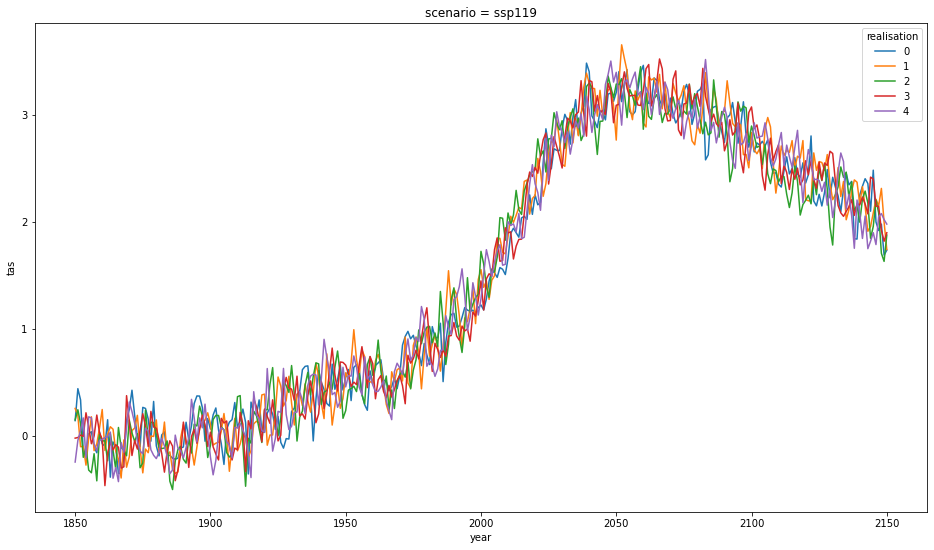

In [10]:
(
    global_mean
    .sel(scenario="ssp119")
    .plot
    .line(hue="realisation", x="year", figsize=(16, 9))
)

Do some stuff with regionmask.

In [11]:
natural_earth_mask = regionmask.defined_regions.natural_earth.countries_110.mask(result_lat_lon)
natural_earth_mask

<xarray.DataArray 'region' (lat: 15, lon: 19)>
array([[ nan,  nan,  nan,  nan,  nan,   9.,  nan,  nan,  nan,  nan,  nan,
         nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan],
       [ nan,  nan,  nan,  nan,  nan,  10.,  nan,  nan,  nan,  nan,  nan,
         nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan],
       [ nan,  nan,  nan,  nan,  nan,  nan,  29.,  nan,  nan,  nan,  nan,
         nan,  nan,  nan,  nan,  nan, 137., 137.,  nan],
       [ nan,  nan,  nan,  nan,  nan,  nan,  29.,  nan,  nan,  nan,  50.,
         nan,  nan,  nan,  nan,  nan, 137., 137.,  nan],
       [ nan,  nan,  nan,  nan,  nan,  31.,  29.,  nan,  nan,  nan,  74.,
         72.,  nan,  nan,  nan,  nan,  nan,  nan,  nan],
       [ nan,  nan,  nan,  nan,  nan,  31.,  29.,  nan,  nan,  nan,  11.,
          1.,  nan,  nan,  nan,  nan,  nan,   7.,  nan],
       [ nan,  nan,  nan,  nan,  nan,  32.,  43.,  nan,  nan,  nan,  66.,
         13.,  nan,  nan,  nan,  nan,  nan,  nan,  nan],
       [ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  65.,  15.,
         14.,  nan,  nan,  nan,  94.,  nan,  nan,  nan],
       [ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  82., 164.,
        163., 158.,  98.,  99., 139.,  nan,  nan,  nan],
       [ nan,  nan,  nan,  27.,   4.,  nan,  nan,  nan,  nan,  82.,  nan,
         83., 107., 102., 139., 139.,  nan,  nan,  nan],
       [ nan,  nan,  nan,   4.,   4.,  nan,  nan,  nan,  nan, 132., 141.,
        124., 106.,   6., 139., 139.,  95.,  nan,  nan],
       [ nan,  nan,   3.,   3.,   3.,   3.,  nan,  nan,  nan,  43., 153.,
        112.,   5.,   5.,  97.,  97., 139.,  18.,  nan],
       [ nan,  nan,   3.,   3.,  nan,   3.,  nan,  nan,  nan,  nan,  nan,
         18.,  18.,  18.,  18.,  18.,  18.,  nan,  18.],
       [  4.,   4.,   3.,   3.,   3.,   3.,  nan,  22.,  nan,  nan, 110.,
         18.,  18.,  18.,  18.,  18.,  18.,  18.,  18.],
       [ nan,  nan,  nan,  nan,  nan,  nan,  22.,  22.,  nan,  nan,  nan,
         nan,  nan,  nan,  nan,  18.,  nan,  nan,  nan]])
Coordinates:
  * lat      (lat) float64 -49.5 -40.5 -31.5 -22.5 -13.5 ... 49.5 58.5 67.5 76.5
  * lon      (lon) float64 -162.0 -144.0 -126.0 -108.0 ... 126.0 144.0 162.0

In [12]:
result_lat_lon_masked = (
    result_lat_lon
    .where(
        natural_earth_mask 
        == regionmask.defined_regions.natural_earth.countries_110.map_keys("Australia")
    )
)
result_lat_lon_masked

<xarray.Dataset>
Dimensions:      (lat: 15, lon: 19, realisation: 5, scenario: 14, year: 301)
Coordinates:
  * scenario     (scenario) object 'rcp26' 'rcp45' ... 'ssp534-over' 'ssp585'
  * realisation  (realisation) int64 0 1 2 3 4
  * year         (year) int64 1850 1851 1852 1853 1854 ... 2147 2148 2149 2150
  * lat          (lat) float64 -49.5 -40.5 -31.5 -22.5 ... 49.5 58.5 67.5 76.5
  * lon          (lon) float64 -162.0 -144.0 -126.0 -108.0 ... 126.0 144.0 162.0
Data variables:
    tas          (scenario, realisation, year, lat, lon) float64 nan nan ... nan

Plot a single map.

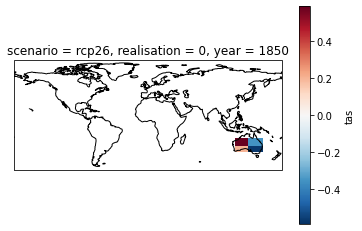

In [13]:
ax = (
    result_lat_lon_masked["tas"]
    .isel(scenario=0, year=0, realisation=0)
    .plot(subplot_kws={"projection": ccrs.PlateCarree()})
)
ax.axes.coastlines()

Plot timeseries (Masked values with dashes, global-mean with solid lines).

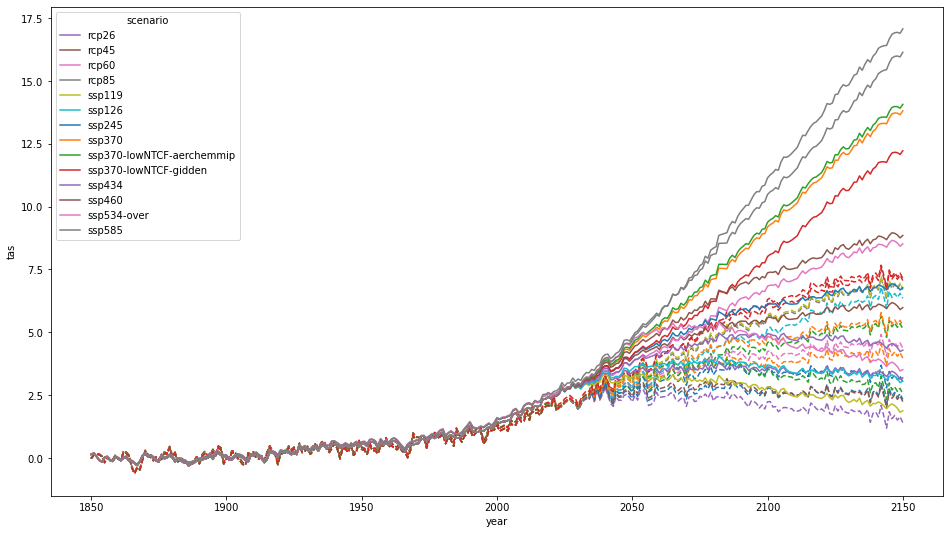

In [14]:
ax = plt.figure(figsize=(16, 9)).add_subplot(111)

for (source, add_legend, linestyle) in (
    (result_lat_lon_masked["tas"], False, "--"), 
    (result_lat_lon["tas"], True, "-")
):
    (
        source
        .weighted(weights)
        .mean(dim=["lat", "lon"])
        .median(dim="realisation")
        .plot
        .line(hue="scenario", x="year", linestyle=linestyle, ax=ax, add_legend=add_legend)
    )